In [9]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from networkx.algorithms import bipartite
import pandas as pd

import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
import re
import random
import scipy

In [2]:
USER = 'user'
BIZ = 'biz'

In [4]:
biz = pd.read_csv('../toronto/toronto_biz.csv')
user = pd.read_csv('../toronto/toronto_users.csv')
reviews = pd.read_csv('../toronto/toronto_reviews.csv')
elite_user = user[~user.elite.str.contains('None')]

In [5]:
print('Reviews:', len(reviews))
print('Users:', len(set(reviews.user_id)))
print('Businesses:', len(set(reviews.business_id)))

Reviews: 379875
Users: 84624
Businesses: 9678


# Creating the network

In [6]:
# A node class for storing data.
class Node:
    def __init__(self, Data, Type):
        self.Data = Data
        self.Type = Type
    
    def to_string(self):
        return "Node (%s), Data: " % (self.Type, self.Data)
    
    def __hash__(self):
        return hash(self.Data)
    def __eq__(self, other):
        return (
                self.__class__ == other.__class__ and 
                self.Data == other.Data
               )

In [7]:
eliteUsers = user[user['elite'] != 'None']
nonEliteUsers = user[user['elite'] == 'None']

# Review Degree distribution

In [10]:
userReviewsCountNonElites = list(nonEliteUsers.review_count)
userReviewsCountNonElites.sort(reverse= True)
userReviewsCountElites = list(eliteUsers.review_count)
userReviewsCountElites.sort(reverse= True)
userReviewsCountAll = list(user.review_count)
userReviewsCountAll.sort(reverse= True)


#TODO Change into a function
degreeCount = collections.Counter(userReviewsCountNonElites)
deg, cnt = zip(*degreeCount.items())



plt.title("Review Degree distribution - Non-Elites")
plt.ylabel("Count")
plt.xlabel("Reviews")
plt.bar(deg,tuple([(x-min(cnt))/(max(cnt)-min(cnt)) for x in cnt]))
plt.xlim(-1,800)
plt.ylim(0,0.85)
plt.show()

degreeCount = collections.Counter(userReviewsCountElites)
deg, cnt = zip(*degreeCount.items())

plt.title("Review Degree distribution - Elites")

plt.ylabel("Count")
plt.xlabel("Reviews")
plt.bar(deg, tuple([(x-min(cnt))/(max(cnt)-min(cnt)) for x in cnt]))
plt.xlim(-1,800)
plt.ylim(0,0.85)
plt.show()


degreeCount = collections.Counter(userReviewsCountAll)
deg, cnt = zip(*degreeCount.items())

plt.title("Review Degree distribution - All")

plt.ylabel("Count")
plt.xlabel("Reviews")
plt.bar(deg, tuple([(x-min(cnt))/(max(cnt)-min(cnt)) for x in cnt]))
plt.xlim(-1,800)
plt.ylim(0,0.85)
plt.show()



NameError: name 'collections' is not defined

# Friend Degree distribution

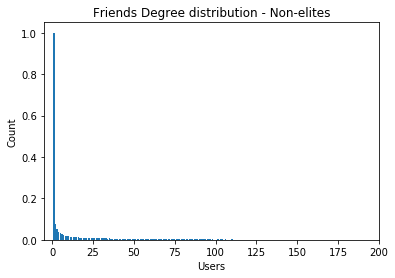

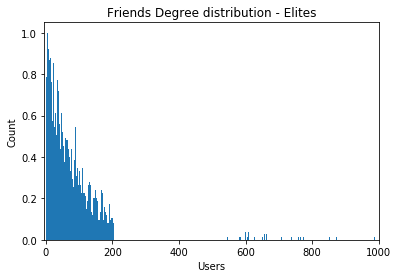

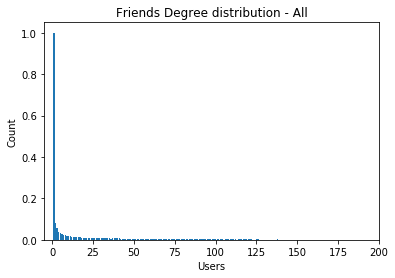

In [17]:
userFriendsCountNonElites = list(nonEliteUsers['friends'].str.count(",")+1)
userFriendsCountNonElites.sort(reverse= True)
userFriendsCountElites = list(eliteUsers['friends'].str.count(",")+1)
userFriendsCountElites.sort(reverse= True)
userFriendsCount = list(user['friends'].str.count(",")+1)
userFriendsCount.sort(reverse= True)

degreeCount = collections.Counter(userFriendsCountNonElites)
deg, cnt = zip(*degreeCount.items())

plt.title("Friends Degree distribution - Non-elites")

plt.ylabel("Count")
plt.xlabel("Users")
plt.bar(deg, tuple([(x-min(cnt))/(max(cnt)-min(cnt)) for x in cnt]))
plt.xlim(-5,200)
plt.ylim(0,1.05)
plt.show()


degreeCount = collections.Counter(userFriendsCountElites)
deg, cnt = zip(*degreeCount.items())

plt.title("Friends Degree distribution - Elites")

plt.ylabel("Count")
plt.xlabel("Users")
plt.bar(deg, tuple([(x-min(cnt))/(max(cnt)-min(cnt)) for x in cnt]))
plt.xlim(-5,1000)
plt.ylim(0,1.05)
plt.show()


degreeCount = collections.Counter(userFriendsCount)
deg, cnt = zip(*degreeCount.items())

plt.title("Friends Degree distribution - All")

plt.ylabel("Count")
plt.xlabel("Users")
plt.bar(deg, tuple([(x-min(cnt))/(max(cnt)-min(cnt)) for x in cnt]))
plt.xlim(-5,200)
plt.ylim(0,1.05)
plt.show()

In [11]:
user[user['user_id'] == 'iLjMdZi0Tm7DQxX1C1_2dg']['friends'].str.count(',')

42389    12197
Name: friends, dtype: int64

# Connected components

In [12]:
#in elites edges is added på non-elites
elites = []
Gfriends_Elites = nx.Graph()
Gfriends_NonElites = nx.Graph()
Gfriends_All = nx.Graph()

for row in user.itertuples(index=True):
    u,fs,el = (row.user_id,row.friends,row.elite)
    if el != 'None':
        Gfriends_All.add_node(u, elite = True, withinToronto= True )             
        elites.append(u)     
    else:
        Gfriends_All.add_node(u, elite = False, withinToronto= True )      
        

In [13]:
#add edges

for row in user.itertuples(index=True):
    u,fs,el = (row.user_id,row.friends,row.elite)
    if fs != 'None':
            for f in fs.split(', '):
                Gfriends_All.add_edge(u,f)

In [15]:
len(Gfriends_All.nodes())

1535281

In [16]:
len(Gfriends_All.edges())

3057827

### remove random from 1 to 100% of elites


In [19]:
one_percent = int(len(elites)*0.01)

random.shuffle(elites)
print("Elites size: " + str(len(elites)))
print("1 % is: " + str(one_percent))

lcc = []

for i in range(0,100):
    print(str(i) + " percent removed.")
    print("Network size: " + str(len(Gfriends_All)))
    mcc = len(max(nx.connected_component_subgraphs(Gfriends_All), key=len))
    lcc.append(mcc)
    print("Largest connected component: " + str(mcc))
    for j in range(0, one_percent):
        popedElite = elites.pop()
        Gfriends_All.remove_node(popedElite)
    
    
        

Elites size: 7499
1 % is: 74
0 percent removed.
Network size: 1535281


KeyboardInterrupt: 

In [71]:
#with open('Remove_Elites_LCC.txt', 'w') as f:
#    for item in lcc:
 #       f.write("%s\n" % item)

### remove random from 1 to 100% of non-elites

In [90]:
precentage = int(len(nonEliteUsers)*0.01)


nonEliteUserList = list(nonEliteUsers.user_id)

random.shuffle(nonEliteUserList)
print("Non-Elites size: " + str(len(nonEliteUserList)))
print("1 % is: " + str(precentage))



lccNonElite = []

for i in range(0,100):
    print(str(i) + " percent removed.")
    print("Network size: " + str(len(Gfriends_All)))
    mcc = len(max(nx.connected_component_subgraphs(Gfriends_All), key=len))
    lccNonElite.append(mcc)
    print("Largest connected component: " + str(mcc))
    for j in range(0,precentage):
        popedNonElite = nonEliteUserList.pop()
        Gfriends_All.remove_node(popedNonElite)

        
        


Non-Elites size: 77125
1 % is: 771
0 percent removed.
Network size: 1535281
Largest connected component: 1487373
1 percent removed.
Network size: 1534510
Largest connected component: 1480426
2 percent removed.
Network size: 1533739
Largest connected component: 1473731
3 percent removed.
Network size: 1532968
Largest connected component: 1467398
4 percent removed.
Network size: 1532197
Largest connected component: 1462333
5 percent removed.
Network size: 1531426
Largest connected component: 1454574
6 percent removed.
Network size: 1530655
Largest connected component: 1446313
7 percent removed.
Network size: 1529884
Largest connected component: 1439389
8 percent removed.
Network size: 1529113
Largest connected component: 1431221
9 percent removed.
Network size: 1528342
Largest connected component: 1424712
10 percent removed.
Network size: 1527571
Largest connected component: 1418366
11 percent removed.
Network size: 1526800
Largest connected component: 1412115
12 percent removed.
Network

In [92]:
#with open('Remove_Non_Elites_LCC.txt', 'w') as f:
#    for item in lccNonElite:
#        f.write("%s\n" % item)

### remove random from 1 to 100% of all

In [98]:
precentage = int(len(user)*0.01)


UserList = list(user.user_id)

random.shuffle(UserList)
print("User size: " + str(len(UserList)))
print("1 % is: " + str(precentage))



lccAllUsers = []

for i in range(0,100):
    print(str(i) + " percent removed.")
    print("Network size: " + str(len(Gfriends_All)))
    mcc = len(max(nx.connected_component_subgraphs(Gfriends_All), key=len))
    lccAllUsers.append(mcc)
    print("Largest connected component: " + str(mcc))
    for j in range(0,precentage):
        popedAll = UserList.pop()
        Gfriends_All.remove_node(popedAll)

        
        
#with open('Remove_All_Users_LCC.txt', 'w') as f:
#    for item in lccAllUsers:
#        f.write("%s\n" % item)

User size: 84624
1 % is: 846
0 percent removed.
Network size: 1535281
Largest connected component: 1487373
1 percent removed.
Network size: 1534435
Largest connected component: 1475596
2 percent removed.
Network size: 1533589
Largest connected component: 1465384
3 percent removed.
Network size: 1532743
Largest connected component: 1455609
4 percent removed.
Network size: 1531897
Largest connected component: 1439658
5 percent removed.
Network size: 1531051
Largest connected component: 1425717
6 percent removed.
Network size: 1530205
Largest connected component: 1415438
7 percent removed.
Network size: 1529359
Largest connected component: 1402807
8 percent removed.
Network size: 1528513
Largest connected component: 1394178
9 percent removed.
Network size: 1527667
Largest connected component: 1382108
10 percent removed.
Network size: 1526821
Largest connected component: 1374017
11 percent removed.
Network size: 1525975
Largest connected component: 1364750
12 percent removed.
Network size:

/Users/asgedarr/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:3363: RuntimeWarning: Second argument 'y1' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  ret = ax.plot(*args, **kwargs)
/Users/asgedarr/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:3363: RuntimeWarning: Second argument 'y2' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  ret = ax.plot(*args, **kwargs)
/Users/asgedarr/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:3363: RuntimeWarning: Second argument 'y3' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  ret = ax.plot(*args, **kwargs)


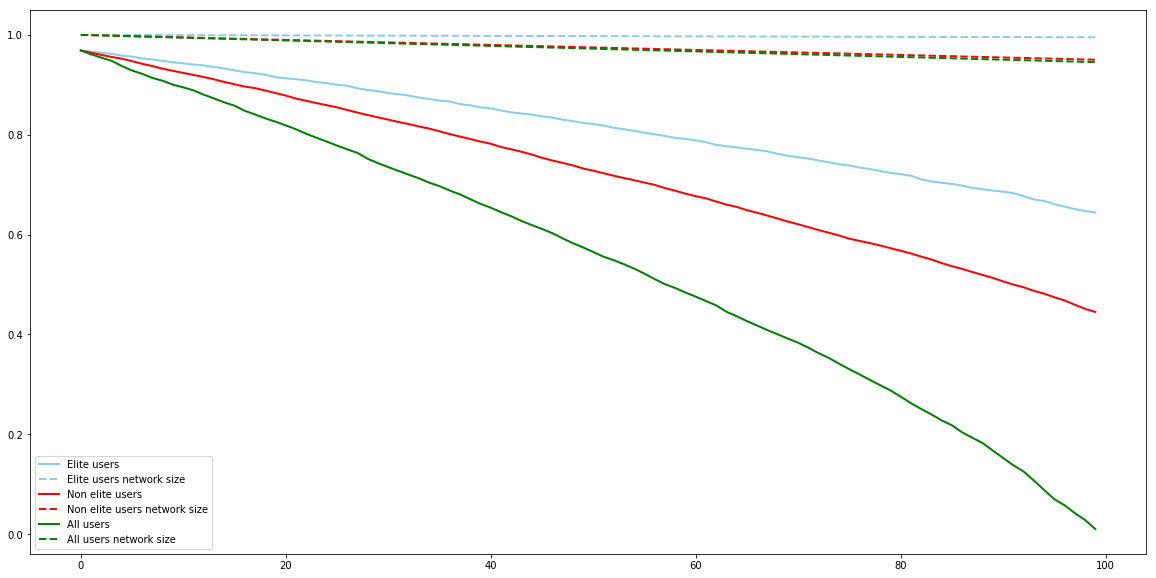

In [154]:
# multiple line plot
x = range(0,100)
y1 = lcc
y2 = lccNonElite
y3 = lccAllUsers

#network sizes
y11 =[]
for d in range(0,100):
    y11.append(len(Gfriends_All)-(int(len(elites)*0.01))*(d))
y21 = []
for d in range(0,100):
    y21.append(len(Gfriends_All)-(int(len(nonEliteUsers)*0.01))*(d))
y31 = []
for d in range(0,100):
    y31.append(len(Gfriends_All)-(int(len(user)*0.01))*(d))



#Normalization
y1 = [number/len(Gfriends_All) for number in y1]
y11 = [number/len(Gfriends_All) for number in y11]
y2 = [number/len(Gfriends_All) for number in y2]
y21 = [number/len(Gfriends_All) for number in y21]
y3 = [number/len(Gfriends_All) for number in y3]
y31 = [number/len(Gfriends_All) for number in y31]

    
    
    
    
    
xmin = 0
xmax = 20
ymin = 1200000
ymax = 1550000


# Data
df=pd.DataFrame({'x': x, 'y1':y1, 'y11':y11,'y2': y2,  'y21': y21, 'y31': y31 , 'y3': y3,  })

plt.figure(figsize=(20,10))
plt.plot( 'x', 'y1', data=df, marker='' , color='skyblue', linewidth=2, label="Elite users")
plt.plot( 'x', 'y11', data=df, marker='', color='skyblue', linewidth=2,linestyle='dashed', label="Elite users network size")
plt.plot( 'x', 'y2', data=df, marker='' , color='red', linewidth=2, label="Non elite users")
plt.plot( 'x', 'y21', data=df, marker='', color='red', linewidth=2, linestyle='dashed', label="Non elite users network size")
plt.plot( 'x', 'y3', data=df, marker='' , color='green', linewidth=2, label="All users")
plt.plot( 'x', 'y31', data=df, marker='', color='green', linewidth=2, linestyle='dashed', label="All users network size")
#plt.axis([xmin,xmax,ymin,ymax])

plt.legend()


In [163]:
precentage = int(len(elites)*0.01)


nonEliteUserList = list(nonEliteUsers.user_id)

random.shuffle(nonEliteUserList)
print("Non-Elites size: " + str(len(nonEliteUserList)))
print("1 % is: " + str(precentage))



lccNonEliteBasedOnEliteSize = []

for i in range(0,100):
    print(str(i) + " percent removed.")
    print("Network size: " + str(len(Gfriends_All)))
    mcc = len(max(nx.connected_component_subgraphs(Gfriends_All), key=len))
    lccNonEliteBasedOnEliteSize.append(mcc)
    print("Largest connected component: " + str(mcc))
    for j in range(0,precentage):
        popedNonElite = nonEliteUserList.pop()
        Gfriends_All.remove_node(popedNonElite)

#with open('Remove_Non_Elites_LCC_based_on_elite_size.txt', 'w') as f:
#    for item in lccNonEliteBasedOnEliteSize:
 #       f.write("%s\n" % item)        

Non-Elites size: 77125
1 % is: 74
0 percent removed.
Network size: 1535281
Largest connected component: 1487373
1 percent removed.
Network size: 1535207
Largest connected component: 1486593
2 percent removed.
Network size: 1535133
Largest connected component: 1485711
3 percent removed.
Network size: 1535059
Largest connected component: 1485196
4 percent removed.
Network size: 1534985
Largest connected component: 1484306
5 percent removed.
Network size: 1534911
Largest connected component: 1483807
6 percent removed.
Network size: 1534837
Largest connected component: 1482875
7 percent removed.
Network size: 1534763
Largest connected component: 1481905
8 percent removed.
Network size: 1534689
Largest connected component: 1481406
9 percent removed.
Network size: 1534615
Largest connected component: 1480865
10 percent removed.
Network size: 1534541
Largest connected component: 1480681
11 percent removed.
Network size: 1534467
Largest connected component: 1479918
12 percent removed.
Network 

In [171]:
precentage = int(len(elites)*0.01)

UserListAll = list(user.user_id)

random.shuffle(UserListAll)
print("Non-Elites size: " + str(len(UserListAll)))
print("1 % is: " + str(precentage))



lccAllUsersBasedOnEliteSize = []

for i in range(0,100):
    print(str(i) + " percent removed.")
    print("Network size: " + str(len(Gfriends_All)))
    mcc = len(max(nx.connected_component_subgraphs(Gfriends_All), key=len))
    lccAllUsersBasedOnEliteSize.append(mcc)
    print("Largest connected component: " + str(mcc))
    for j in range(0,precentage):
        popedNonElite = UserListAll.pop()
        Gfriends_All.remove_node(popedNonElite)

#with open('Remove_All_LCC_based_on_elite_size.txt', 'w') as f:
#    for item in lccNonEliteBasedOnEliteSize:
#        f.write("%s\n" % item)   

Non-Elites size: 84624
1 % is: 74
0 percent removed.
Network size: 1535281
Largest connected component: 1487373
1 percent removed.
Network size: 1535207
Largest connected component: 1486278
2 percent removed.
Network size: 1535133
Largest connected component: 1485618
3 percent removed.
Network size: 1535059
Largest connected component: 1483942
4 percent removed.
Network size: 1534985
Largest connected component: 1483463
5 percent removed.
Network size: 1534911
Largest connected component: 1482912
6 percent removed.
Network size: 1534837
Largest connected component: 1481838
7 percent removed.
Network size: 1534763
Largest connected component: 1480479
8 percent removed.
Network size: 1534689
Largest connected component: 1479679
9 percent removed.
Network size: 1534615
Largest connected component: 1478688
10 percent removed.
Network size: 1534541
Largest connected component: 1478291
11 percent removed.
Network size: 1534467
Largest connected component: 1477108
12 percent removed.
Network 

/Users/asgedarr/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:3363: RuntimeWarning: Second argument 'y1' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  ret = ax.plot(*args, **kwargs)
/Users/asgedarr/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:3363: RuntimeWarning: Second argument 'y2' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  ret = ax.plot(*args, **kwargs)
/Users/asgedarr/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:3363: RuntimeWarning: Second argument 'y3' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  ret = ax.plot(*args, **kwargs)


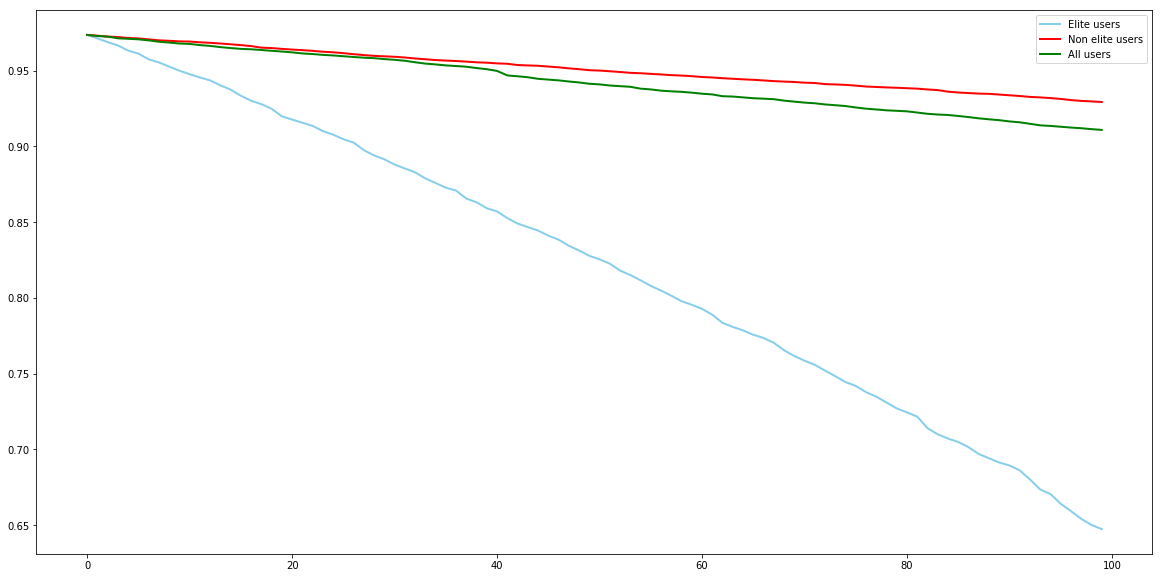

In [172]:
# multiple line plot
x = range(0,100)
y1 = lcc
y2 = lccNonEliteBasedOnEliteSize
y3 = lccAllUsersBasedOnEliteSize



#Normalization
y1 = [number/len(Gfriends_All) for number in y1]
y2 = [number/len(Gfriends_All) for number in y2]
y3 = [number/len(Gfriends_All) for number in y3]


    
    
    
    
    
xmin = 0
xmax = 20
ymin = 1200000
ymax = 1550000


# Data
df=pd.DataFrame({'x': x, 'y1':y1, 'y2': y2, 'y3': y3,  })

plt.figure(figsize=(20,10))
plt.plot( 'x', 'y1', data=df, marker='' , color='skyblue', linewidth=2, label="Elite users")
plt.plot( 'x', 'y2', data=df, marker='' , color='red', linewidth=2, label="Non elite users")
plt.plot( 'x', 'y3', data=df, marker='' , color='green', linewidth=2, label="All users")
#plt.axis([xmin,xmax,ymin,ymax])

plt.legend()